In [1]:
### Emma Beyer & Desa Bolger
### Add more info here, email address etc.

#The goal of this document is to explore the relation of wrecks and years

#Read in packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [3]:
#Read Interstate Wrecks into a Pandas dataframe
NC_InterstateWrecks = gpd.read_file('../Data/Processed/NCinterstateWrecks.shp')
NC_InterstateWrecks.head()

,FID_Wrecks,positionqu,objectname,objectcate,yearsunk,comment,datasource,sourcereco,objectid,sourcedate,FID_NCintr,WATER,Shape_Leng,Shape_Area,geometry
0,3189,None,None,wreck,0.0,None,US5ILMED.000,ENCHWPT,3190,200304,0,S,72.730933,0.872685,POINT (-77.99495 33.90029)
1,19199,None,None,obstruction,0.0,BROKEN DRAIN PIPE,US5SC34M.000,ENCHOPT,19200,20151216,0,S,72.730933,0.872685,POINT (-78.41322 33.90072)
2,944,None,None,wreck,0.0,None,US5SC34M.000,ENCHWPT,945,200608,0,S,72.730933,0.872685,POINT (-78.40138 33.90409)
3,4710,None,None,wreck,0.0,None,US5ILMEC.000,ENCHWPT,4711,201304,0,S,72.730933,0.872685,POINT (-78.01604 33.90438)
4,35030,Low,None,wreck,0.0,"UNKNOWN SOURCE BETWEEN 1972 - 1974, A WRECK WA...",AWOIS,AWOIS,35031,None,0,S,72.730933,0.872685,POINT (-78.01604 33.90439)


In [4]:
#Read Interstate and 200 nm EEZ Wrecks into a Pandas dataframe
NC_Interstate_EEZ_Wrecks = gpd.read_file('../Data/Processed/NCinterstateand200EEZ.shp')
NC_Interstate_EEZ_Wrecks.head()

,FID_Wrecks,positionqu,objectname,objectcate,yearsunk,comment,datasource,sourcereco,objectid,sourcedate,...,un_ter1,un_ter2,un_ter3,FID_NCboun,Id,Shape_Leng,Shape_Area,NEAR_FID,NEAR_DIST,geometry
0,34975,Low,HERCULES,wreck,0.0,"00470 01 DATED 1923 24 NO.8824 - SCHOONER, 163...",AWOIS,AWOIS,34976,None,...,840.0,0.0,0.0,0,0,247.455987,45.11857,NaN,NaN,POINT (-79.5831 30.71691)
1,34980,Low,ESSO GETTYSBURG,wreck,0.0,"00478 24 NO.1162 - TANKER, 10172 GT - SUNK 6/1...",AWOIS,AWOIS,34981,None,...,840.0,0.0,0.0,0,0,247.455987,45.11857,NaN,NaN,POINT (-79.24976 31.00024)
2,34981,Low,DAISY FORLIN,wreck,0.0,"00479 01 1920 24 NO.8804 - 466 GT, SUNK 11/18/...",AWOIS,AWOIS,34982,None,...,840.0,0.0,0.0,0,0,247.455987,45.11857,NaN,NaN,POINT (-80.16646 31.00024)
3,23998,None,None,wreck,0.0,None,US4GA11M.000,ENCAWPT,23999,20010602,...,840.0,0.0,0.0,0,0,247.455987,45.11857,NaN,NaN,POINT (-80.96661 31.31684)
4,34987,Low,None,wreck,0.0,"NM41/47(5360) WK OF A TUG, WILL BE MARKED WITH...",AWOIS,AWOIS,34988,None,...,840.0,0.0,0.0,0,0,247.455987,45.11857,NaN,NaN,POINT (-80.96648 31.3169)


In [5]:
#Summary data on the years of Interstate Wreaks
NC_InterstateWrecks['yearsunk'].describe()

count    535.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: yearsunk, dtype: float64

In [6]:
#Summary data on the years of Interstate and EEZ Wreaks
NC_Interstate_EEZ_Wrecks['yearsunk'].describe()

count    6256.000000
mean        9.692775
std       137.382407
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2009.000000
Name: yearsunk, dtype: float64

In [34]:
# Remove all the zero values and create a new DataFrame
NC_Interstate_EEZ_Wrecks_nozeros = NC_Interstate_EEZ_Wrecks[NC_Interstate_EEZ_Wrecks['yearsunk'] != 0]

# Convert the year values to integers
NC_Interstate_EEZ_Wrecks_nozeros['yearsunk'] = NC_Interstate_EEZ_Wrecks_nozeros['yearsunk'].astype(int)

# Verify the changes
NC_Interstate_EEZ_Wrecks_nozeros['yearsunk'].head()


200     1980
363     1996
1023    1923
1024    1957
1042    1923
Name: yearsunk, dtype: int32


C:\Users\ekb41\AppData\Local\ESRI\conda\envs\gis\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, 'Number of Wrecks by Year')

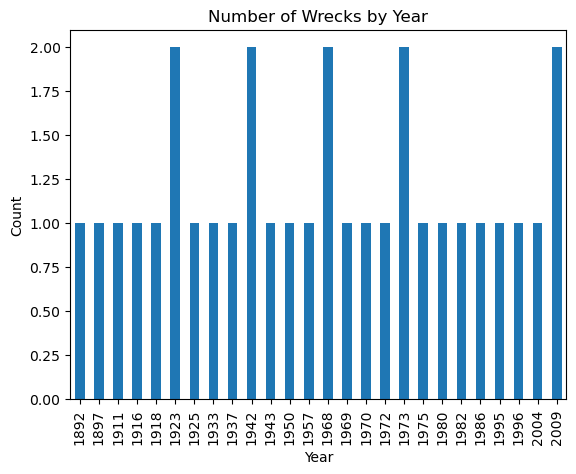

In [37]:
#Change years into count values
wreck_counts = NC_Interstate_EEZ_Wrecks_nozeros['yearsunk'].value_counts().sort_index()
#Plot number of wrecks by year
wreck_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Wrecks by Year')

In [ ]:
# Plot of EEZ
ax = shapefile_1.plot(color='blue', edgecolor='black', figsize=(10, 10))

# Plot the second shapefile on top of the first one
shapefile_2.plot(ax=ax, color='red', edgecolor='black')